In [2]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Wczytywanie danych
data = pd.read_csv("weatherAUS.csv")

In [4]:

# Podstawowe informacje o danych
print("Pierwsze 5 wierszy danych:")
display(data.head())

print("\nPodstawowe informacje:")
data.info()

print("\nPodstawowe statystyki opisowe:")
display(data.describe())

Pierwsze 5 wierszy danych:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No



Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
def convert_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [6]:
data["RainTomorrow"] = data["RainTomorrow"].apply(lambda x:convert_to_binary(x))

In [7]:
data["RainToday"] = data["RainToday"].apply(lambda x:convert_to_binary(x))

In [8]:
# Analiza brakujących danych
print("Brakujące wartości w kolumnach:")
display(data.isnull().sum())


Brakujące wartości w kolumnach:


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

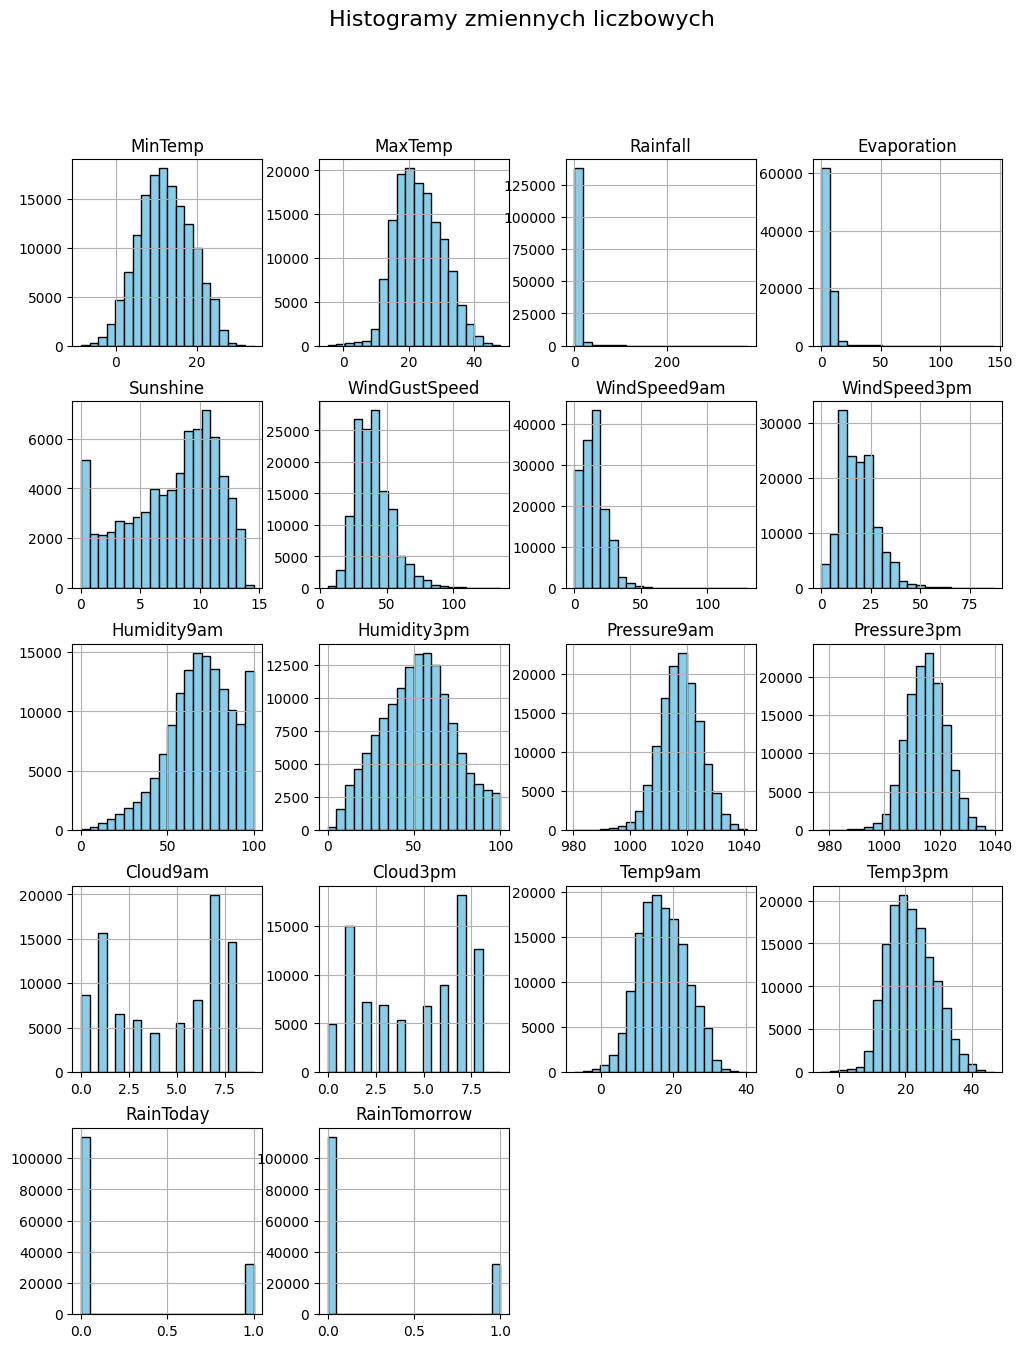

In [9]:
# Rozkład zmiennych liczbowych
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(bins=20, figsize=(12, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histogramy zmiennych liczbowych", fontsize=16)
plt.show()

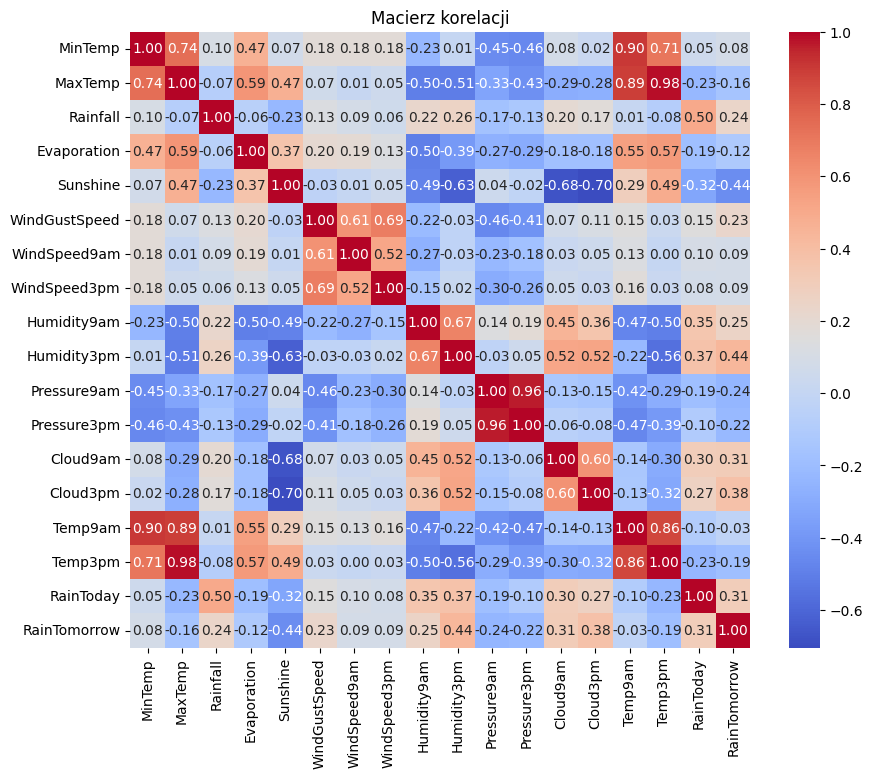

In [10]:
# Korelacja między zmiennymi liczbowymi
correlation = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

C:\Users\bartek\AppData\Local\Temp\ipykernel_35608\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


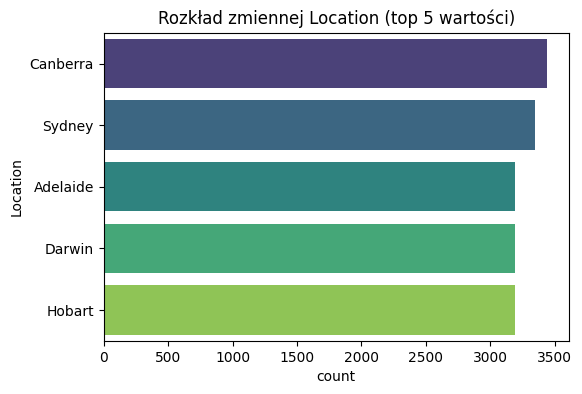

C:\Users\bartek\AppData\Local\Temp\ipykernel_35608\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


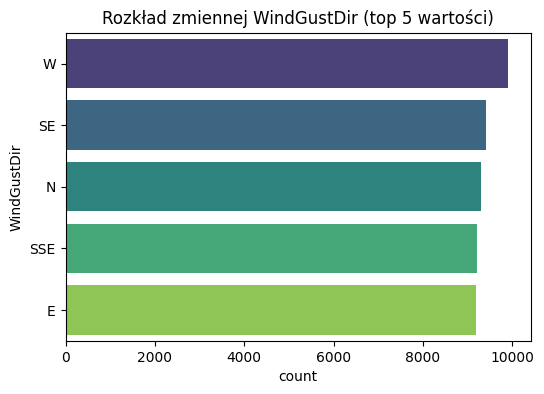

C:\Users\bartek\AppData\Local\Temp\ipykernel_35608\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


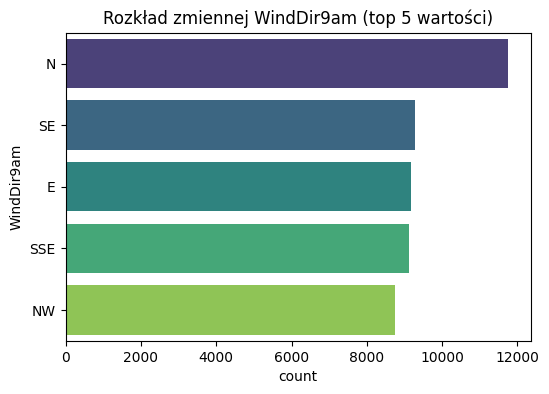

C:\Users\bartek\AppData\Local\Temp\ipykernel_35608\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


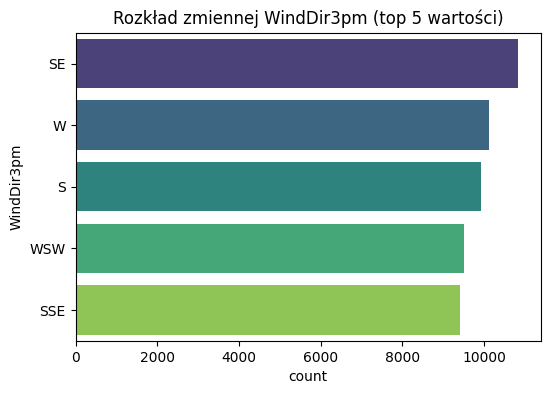

In [28]:
# Lista zmiennych kategorycznych, z wykluczeniem kolumny 'Date'
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Date']

# Tworzenie wykresów dla pozostałych kolumn kategorycznych
for column in categorical_cols:
    plt.figure(figsize=(6, 4))
    
    # Wybranie top 5 najczęstszych wartości w kolumnie
    top_5_values = data[column].value_counts().nlargest(5).index
    filtered_data = data[data[column].isin(top_5_values)]
    
    sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)
    plt.title(f"Rozkład zmiennej {column} (top 5 wartości)")
    plt.show()


Pary zmiennych o wysokiej korelacji:
Temp3pm      MaxTemp        0.968713
MaxTemp      Temp3pm        0.968713
Pressure9am  Pressure3pm    0.959662
Pressure3pm  Pressure9am    0.959662
MinTemp      Temp9am        0.897692
Temp9am      MinTemp        0.897692
             MaxTemp        0.879170
MaxTemp      Temp9am        0.879170
Temp3pm      Temp9am        0.846141
Temp9am      Temp3pm        0.846141
MaxTemp      MinTemp        0.733400
MinTemp      MaxTemp        0.733400
dtype: float64


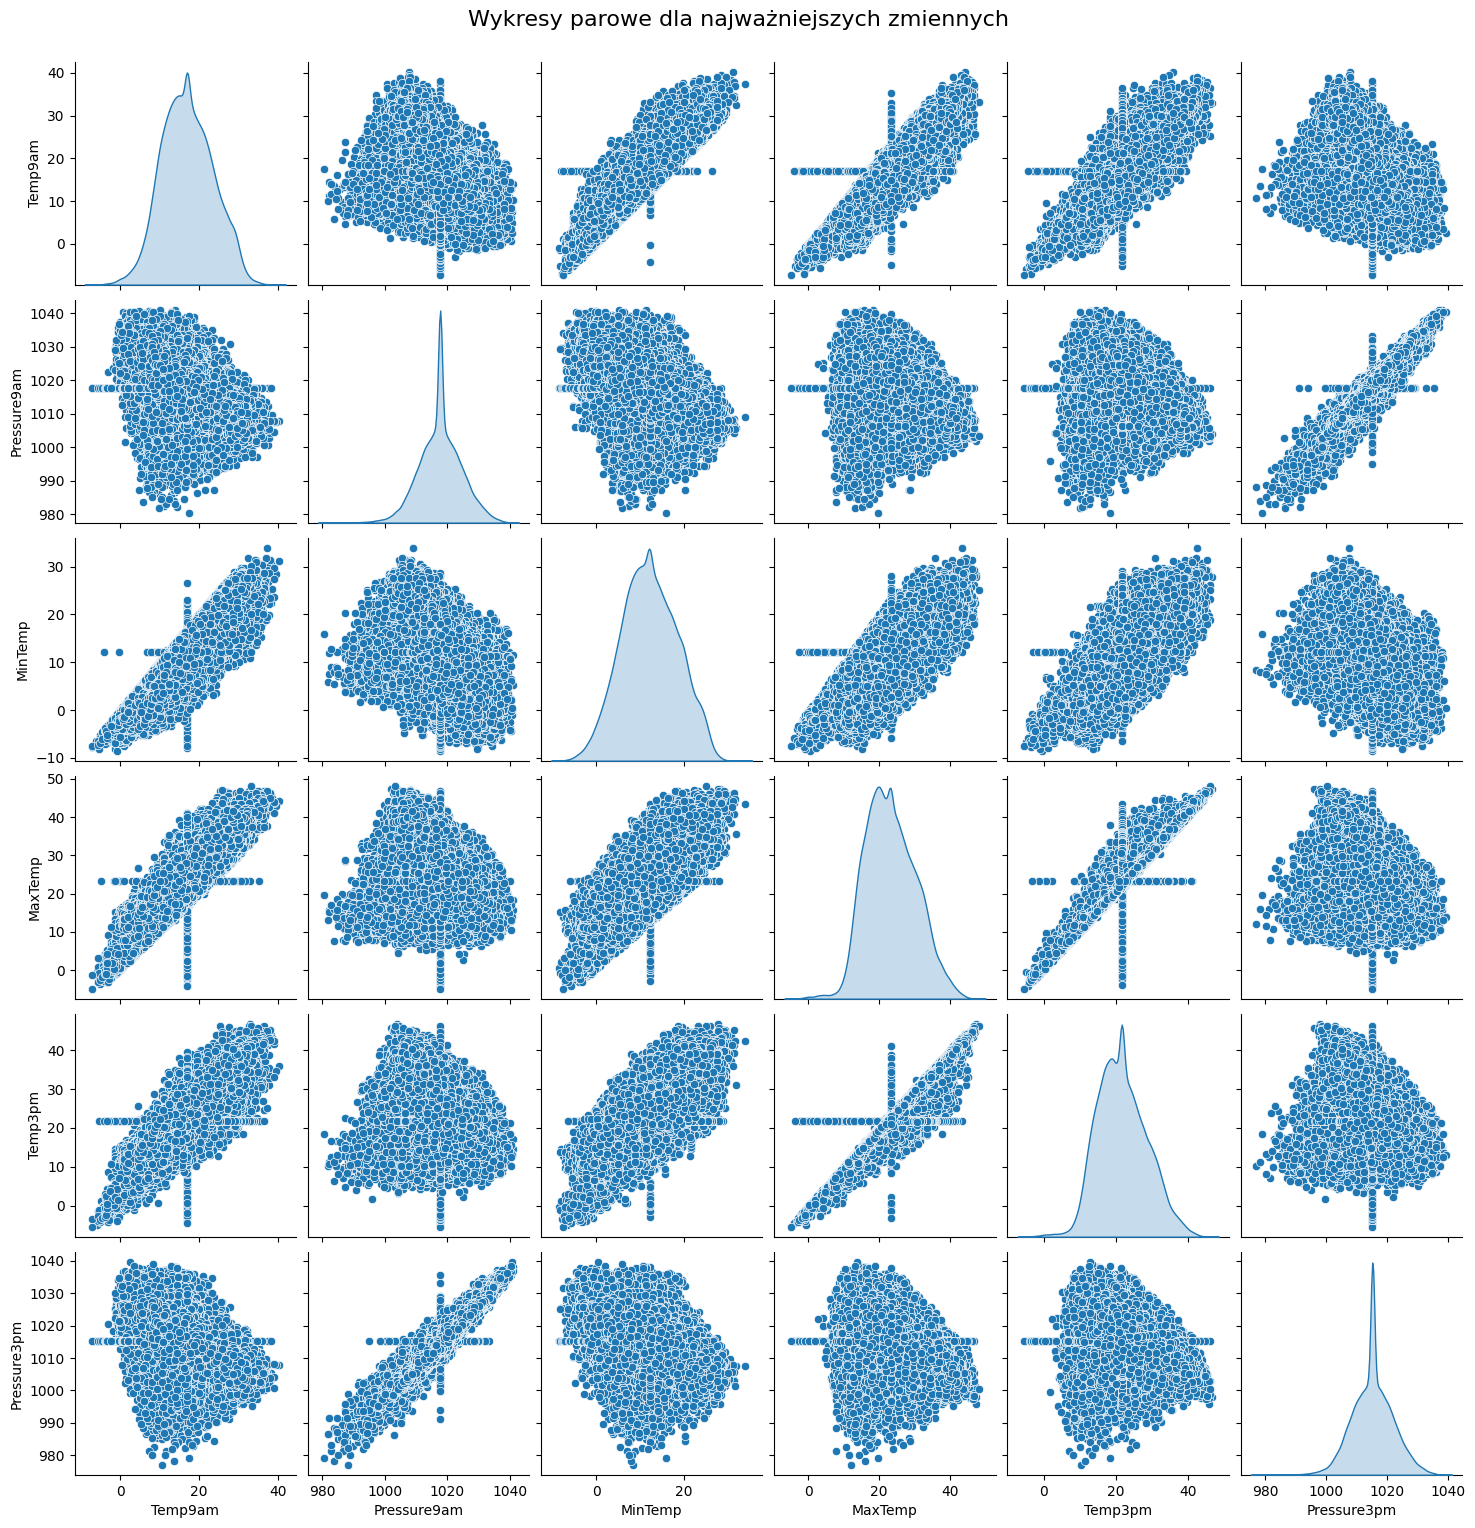

In [29]:
# Obliczanie macierzy korelacji dla zmiennych liczbowych
correlation_matrix = data[numeric_cols].corr()

# Znalezienie par zmiennych o najwyższej korelacji (bez diagonalnych 1.0)
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = correlation_pairs[
    (correlation_pairs < 1) & (correlation_pairs > 0.7)
]  # Korelacje powyżej 0.7

# Wyświetlenie par zmiennych o wysokiej korelacji
print("Pary zmiennych o wysokiej korelacji:")
print(high_correlation_pairs)

# Wybór unikalnych zmiennych do wykresów
important_columns = list(set([index[0] for index in high_correlation_pairs.index] + 
                             [index[1] for index in high_correlation_pairs.index]))

# Wygenerowanie wykresów parowych dla tych zmiennych
sns.pairplot(data[important_columns].dropna(), diag_kind="kde")
plt.suptitle("Wykresy parowe dla najważniejszych zmiennych", y=1.02, fontsize=16)
plt.show()


In [13]:
from sklearn.impute import SimpleImputer

# Sprawdzenie brakujących wartości
print("Brakujące wartości przed imputacją:")
print(data.isnull().sum())

# Wybór zmiennych liczbowych do imputacji
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Tworzenie modelu SimpleImputer z użyciem średniej
imputer = SimpleImputer(strategy='mean')

# Dopasowanie i transformacja zmiennych liczbowych
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Sprawdzenie braków po imputacji
print("\nBrakujące wartości po imputacji (zmienne liczbowe):")
print(data.isnull().sum())



Brakujące wartości przed imputacją:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

Brakujące wartości po imputacji (zmienne liczbowe):
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
P

In [14]:
print("Pierwsze 5 wierszy danych:")
display(data.head())

Pierwsze 5 wierszy danych:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [26]:
# Usuń wiersze, gdzie RainTomorrow ma brakujące wartości
data_cleaned = data.dropna(subset=['RainTomorrow'])

In [27]:
# Wybierz kolumny dotyczące kierunku wiatru
wind_direction_columns = ['WindDir9am', 'WindDir3pm', 'WindGustDir']

# Wykonaj one-hot encoding tylko dla tych kolumn
data_encoded = pd.get_dummies(data_cleaned, columns=wind_direction_columns, drop_first=True)

# Wyświetl pierwsze wiersze dla sprawdzenia
data_encoded.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,...,False,False,False,False,False,False,False,True,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,...,False,False,False,False,False,False,False,False,True,False
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,...,False,False,False,False,False,False,False,True,False,False
